<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"></ul></div>

# Для начала посчитаем ретеншен пользователей с разным каналом траффика

In [1]:
import pandas as pd
import pandahouse as ph

import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
connection = {
    'host': 'https://clickhouse.lab.karpov.courses',
    'database':'simulator_*****',
    'user':'student', 
    'password':'dpo_python_2020'
}

query = '''
SELECT 
    toString(start_day) start_day,
    toString(day) day,
    count(user_id) AS users
FROM
  (SELECT user_id,
          min(toDate(time)) AS start_day
    FROM simulator_*****.feed_actions
    where source = 'ads'
    GROUP BY user_id
    HAVING start_day >= today() - 30
    ) t1
  JOIN
    (SELECT DISTINCT user_id,
                      toDate(time) AS day
    FROM simulator_*****.feed_actions
    where source = 'ads'
    ) t2 
  USING user_id
GROUP BY start_day, day
'''

In [3]:
df = ph.read_clickhouse(query, connection=connection)

In [4]:
df.head()

,start_day,day,users
0,2023-04-06,2023-04-07,149
1,2023-03-17,2023-04-06,82
2,2023-03-18,2023-03-25,279
3,2023-03-10,2023-04-04,80
4,2023-03-30,2023-04-01,135


In [5]:
df['start_day'] = pd.to_datetime(df['start_day'])
df['day'] = pd.to_datetime(df['day'])
df['day_n'] = (df['day'] - df['start_day']).dt.days
df.head()

,start_day,day,users,day_n
0,2023-04-06,2023-04-07,149,1
1,2023-03-17,2023-04-06,82,20
2,2023-03-18,2023-03-25,279,7
3,2023-03-10,2023-04-04,80,25
4,2023-03-30,2023-04-01,135,2


In [6]:
pivot = df.pivot_table(index='start_day', columns='day_n', values='users')

<AxesSubplot:xlabel='day_n', ylabel='start_day'>

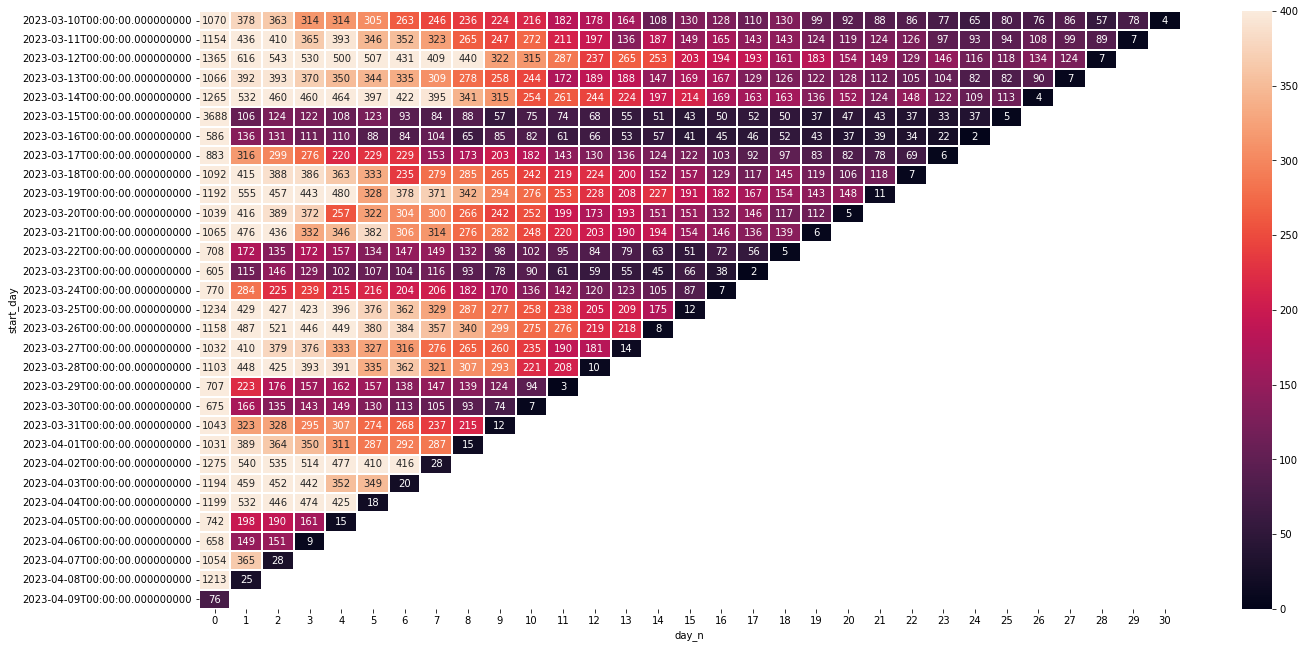

In [7]:
plt.rcParams['figure.figsize'] = [22, 11]
sns.heatmap(pivot, linewidth=.01, annot=True, fmt='g', vmin=0, vmax=400)

In [8]:
pivot = pivot.divide(pivot[0], axis=0)

<AxesSubplot:xlabel='day_n', ylabel='start_day'>

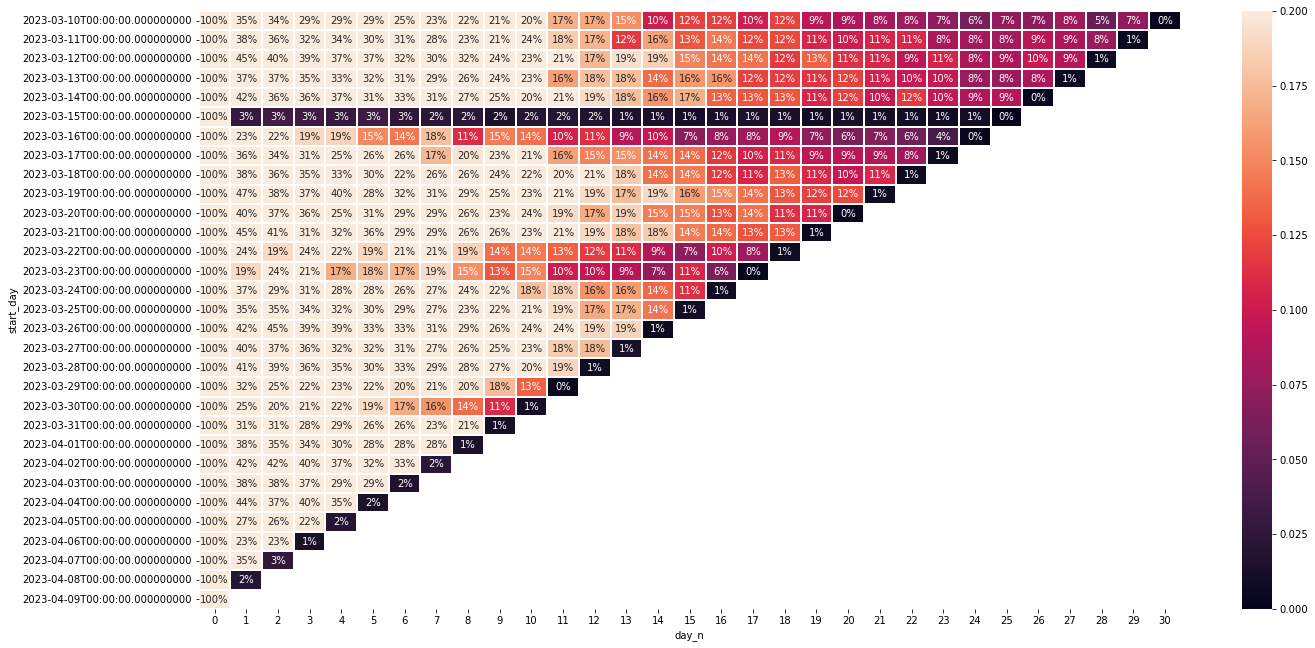

In [9]:
sns.heatmap(pivot, linewidth=.01, annot=True, fmt='.0%', vmin=0, vmax=0.20)

In [10]:
query2 = '''
SELECT 
    toString(start_day) start_day,
    toString(day) day,
    count(user_id) AS users
FROM
  (SELECT user_id,
          min(toDate(time)) AS start_day
    FROM simulator_*****.feed_actions
    where source = 'organic'
    GROUP BY user_id
    HAVING start_day >= today() - 30
    ) t1
  JOIN
    (SELECT DISTINCT user_id,
                      toDate(time) AS day
    FROM simulator_*****.feed_actions
    where source = 'organic'
    ) t2 
  USING user_id
GROUP BY start_day, day
'''

In [11]:
df2 = ph.read_clickhouse(query2, connection=connection)
df2['start_day'] = pd.to_datetime(df2['start_day'])
df2['day'] = pd.to_datetime(df2['day'])
df2['day_n'] = (df2['day'] - df2['start_day']).dt.days
pivot2 = df2.pivot_table(index='start_day', columns='day_n', values='users')

<AxesSubplot:xlabel='day_n', ylabel='start_day'>

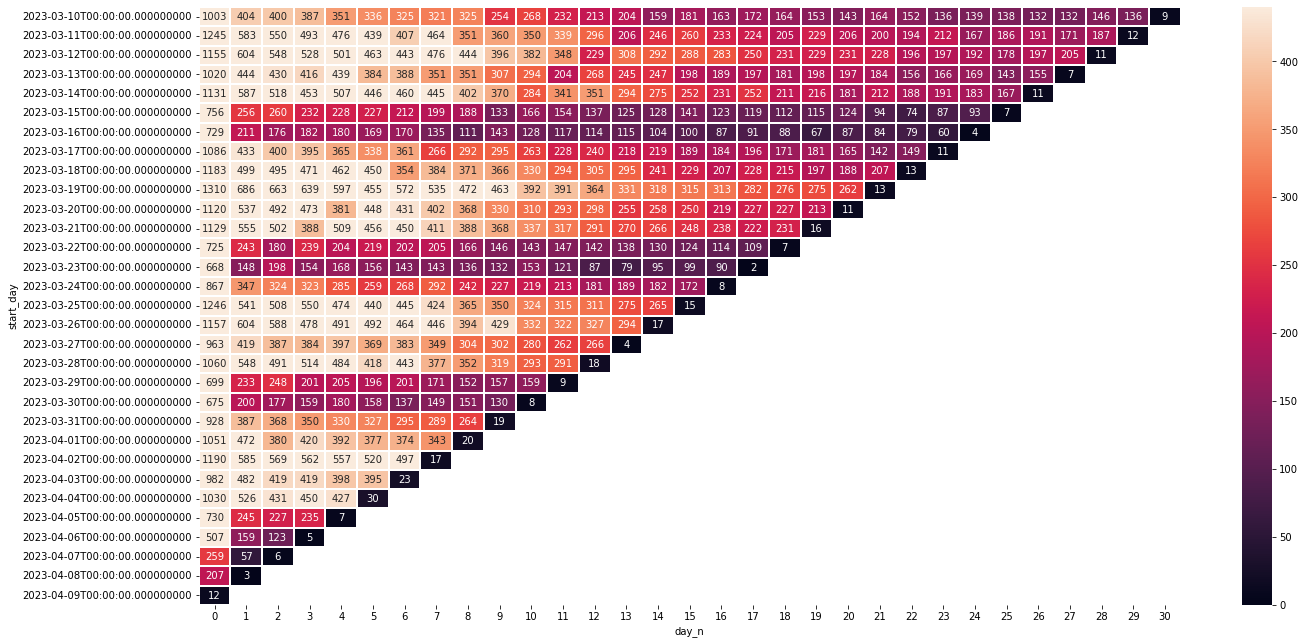

In [12]:
sns.heatmap(pivot2, linewidth=.01, annot=True, fmt='g', vmin=0, vmax=440)

<AxesSubplot:xlabel='day_n', ylabel='start_day'>

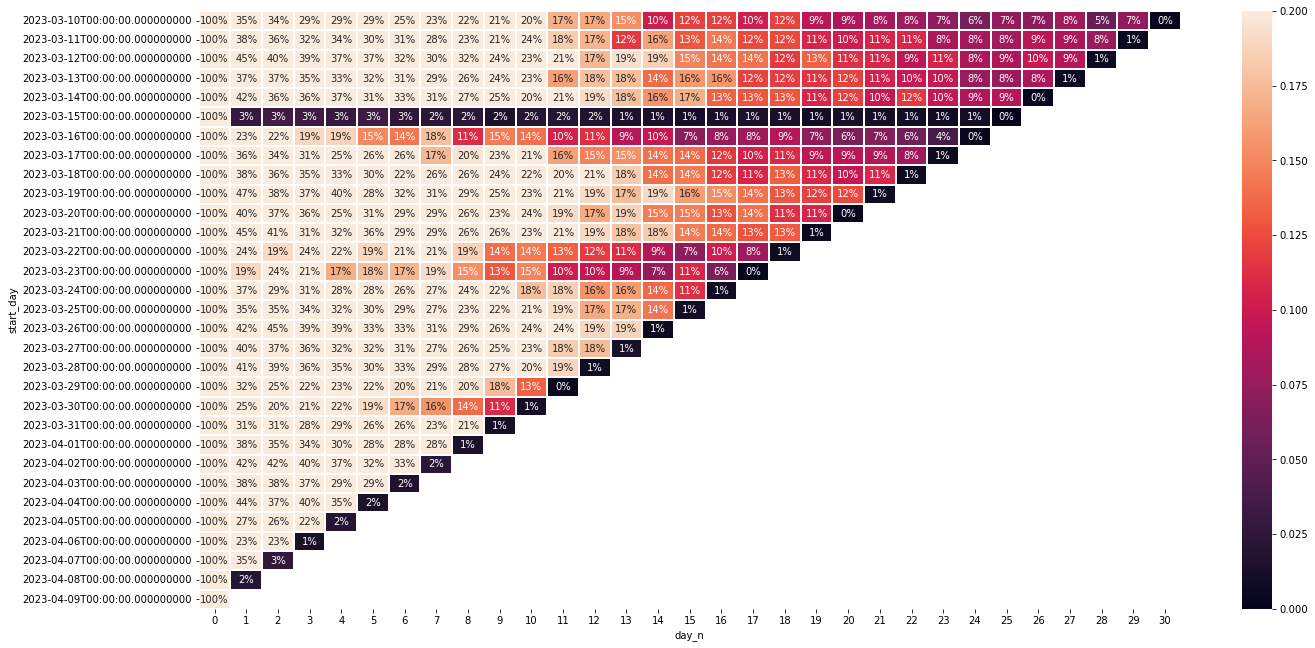

In [13]:
pivot2 = pivot2.divide(pivot2[0], axis=0)
sns.heatmap(pivot, linewidth=.01, annot=True, fmt='.0%', vmin=0, vmax=0.20)

# Вывод
Если посмотреть на процентный уровень возврата пользователей от разных источников траффика, то можно увидеть что возврат приблизительно одинаков